# Plotting and analyzing data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict

In [16]:
# data = readlines("n0.dat")
def getData(filename, startTime, endTime):
    # print(filename)
    with open(filename) as f:
        data = f.readlines()
    time=[]
    val =[]
    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        if t<startTime: continue
        if t>endTime: break
        v = int(i[1].strip())
        time.append(t)
        val.append(v)
    f.close()
    plt.plot(time, val, label="cwnd length alteration of node"+str(random.randint(3, 50)))
    return (time, val)

def printData(filename):
    print(filename)
    with open(filename) as f:
        data = f.readlines()
    time=[]
    val =[]
    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        # if t<150: continue
        v = int(i[1].strip())
        time.append(t)
        val.append(v)
    f.close()
    print(time)
    print(val)    


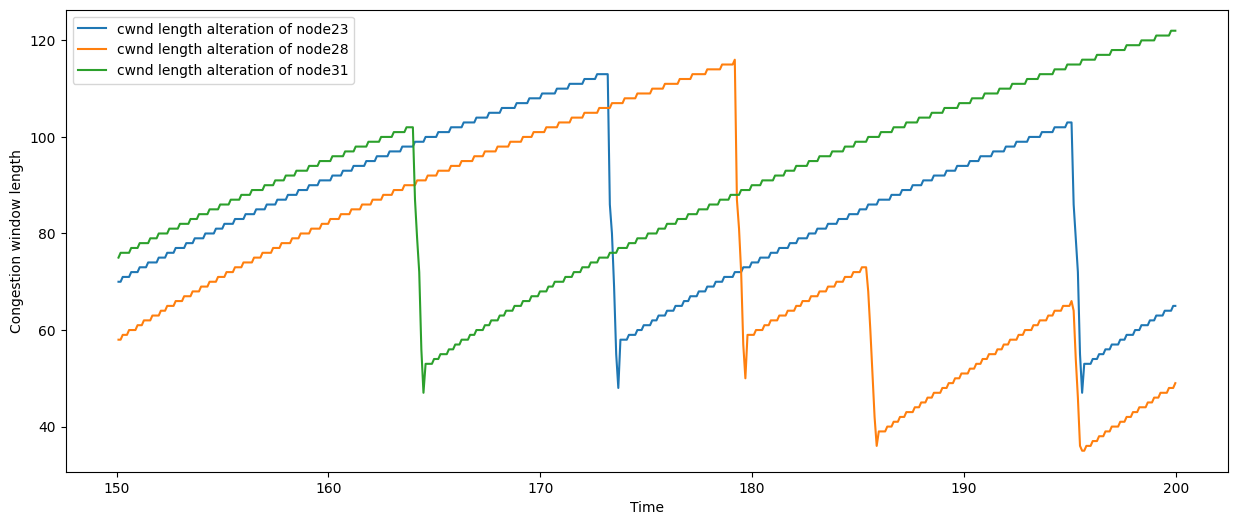

In [24]:
nodeNO = 1
plt.figure(figsize=(15,6))
for i in range(23, 26):
    getData("tcp-dumbbellQsize1/dumbbell-"+str(i)+".cwnd", 150, 200)

plt.ylabel("Congestion window length")
plt.xlabel("Time")
plt.legend()


In [4]:
avgVal = [0 for i in range(2, 62)]

for idx in range(2, 62):
    filename = f"tcp-dumbbell/dumbbell-{idx}.cwnd"
    with open(filename) as f:
        data = f.readlines()
    time=[]
    val =[]
    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        if t<150: continue
        v = int(i[1].strip())
        time.append(t)
        val.append(v)
    f.close()

In [5]:

def closeInt(x):
    return x.round() if abs(x - x.round()) >= abs(x - (x+1).round()) else 1+x.round()

In [11]:
allVals = defaultdict(int)

for cnt in range(2, 62):
    filename = f"tcp-dumbbell-regular-interval-it1/dumbbell-{cnt}.cwnd"
    with open(filename) as f:
        data = f.readlines()

    dick = {}
    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        v = int(i[1].strip())
        if(t<=100 or t>=400): continue
        allVals[t]+=v
    f.close()

In [45]:
x = list(allVals.keys())
x.sort()
y = []
for i in x:
    y.append(allVals[i]/60)

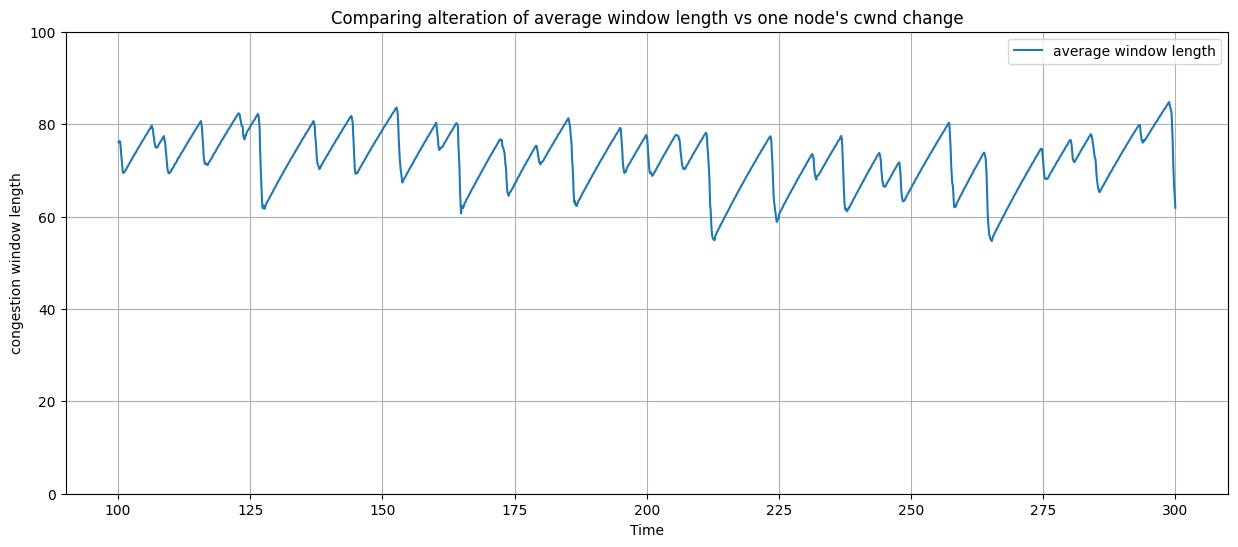

In [46]:
y = y[:2000]
x = x[:2000]
plt.figure(figsize=(15,6))
plt.title("Comparing alteration of average window length vs one node's cwnd change")
plt.xlabel("Time")
plt.ylabel("congestion window length")
plt.plot(x, y, label="average window length")
for i in range(35, 36):
    getData("tcp-dumbbellQsize1/dumbbell-"+str(i)+".cwnd", 210, 270)
# for i in range(7,8):
#     getData("tcp-dumbbellQsize1/dumbbell-"+str(i)+".cwnd", 200, 250)
plt.ylim(0, 100)
plt.grid()
plt.legend()

In [9]:
len(x)

600

Text(0.5, 1.0, 'iteration 1')

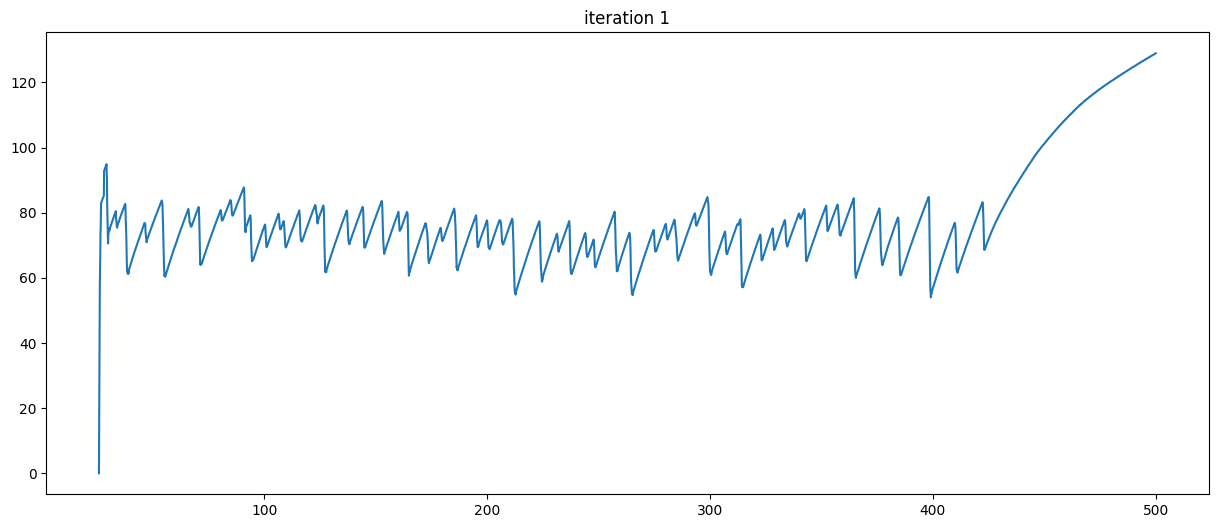

In [8]:
allVals = defaultdict(int)

for cnt in range(2, 62):    
    filename = f"tcp-dumbbell-regular-interval-it1/dumbbell-{cnt}.cwnd"
    with open(filename) as f:
        data = f.readlines()

    dick = {}
    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        v = int(i[1].strip())
        # if(t<=200 or t>=250): continue
        allVals[t] += v
    f.close()




x = list(allVals.keys())
x.sort()
y = []
for i in x:
    y.append(allVals[i]/60)


plt.figure(figsize=(15,6))
plt.plot(x, y)
plt.title("iteration 1")

Text(0.5, 1.0, 'iteration 2')

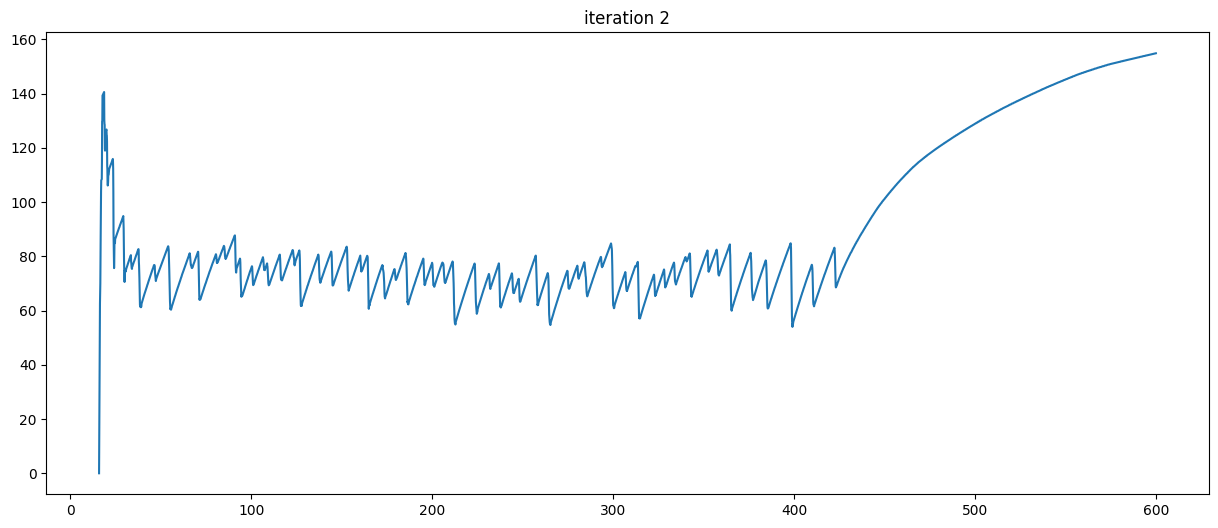

In [31]:
allVals = defaultdict(int)
noOfPoints = defaultdict(int)

for cnt in range(2, 62):
    filename = f"tcp-dumbbell-regular-interval-it2/dumbbell-{cnt}.cwnd"
    with open(filename) as f:
        data = f.readlines()

    dick = {}
    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        v = int(i[1].strip())
        # if(t<=200 or t>=250): continue
        dick[t] = v
    f.close()

    for i in dick:
        allVals[round(i,1)] += dick[i]
        noOfPoints[round(i,1)] += 1



x = list(allVals.keys())
x.sort()
# x = x[:200]
y = []
for i in x:
    y.append(allVals[i]/noOfPoints[i])
    # y.append(allVals[i])


plt.figure(figsize=(15,6))
# plt.plot(list(allVals.keys()), list(allVals.values()))
plt.plot(x, y)
plt.title("iteration 2")

##### Calculating beta-value

In [4]:
timeframe = defaultdict(list)

for cnt in range(2, 62):
    filename = f"tcp-dumbbell-regular-interval-it1/dumbbell-{cnt}.cwnd"
    with open(filename) as f:
        data = f.readlines()

    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        v = int(i[1].strip())
        # if(t<=200 or t>=250): continue
        timeframe[t].append(v)
    f.close()

avg = {}
for i in timeframe:
    avg[i] = sum(timeframe[i])/len(timeframe[i])

##### Simple regression (s(biwi2)/s(wi2))

In [5]:
biwi2 = 0
wi2 = 0
l = list(timeframe.keys())
for n in range(60):
    for i in range(len(l)):
        if l[i] <= 200: continue
        if timeframe[l[i]][n] < timeframe[l[i-1]][n]:
            biwi2 += timeframe[l[i]][n] * timeframe[l[i-1]][n]
            wi2 += timeframe[l[i-1]][n] * timeframe[l[i-1]][n]
            break

print("Beta-opt = ", biwi2/wi2)

Beta-opt =  0.814146016019226


##### Updated formula (s(biwi2)/av*s(wi))

In [6]:
biwi2 = 0
wi = 0
l = list(timeframe.keys())
for n in range(60):
    for i in range(len(l)):
        if l[i] <= 200: continue
        if timeframe[l[i]][n] < timeframe[l[i-1]][n]:
            print(n, " ", timeframe[l[i]][n] / timeframe[l[i-1]][n])
            biwi2 += timeframe[l[i]][n] * timeframe[l[i-1]][n]
            wi += timeframe[l[i-1]][n]
            break

print("Beta-opt = ", 60*biwi2/(wi*wi))

0   0.8985507246376812
1   0.9180327868852459
2   0.689922480620155
3   0.9402985074626866
4   0.8987341772151899
5   0.92
6   0.8717948717948718
7   0.7258064516129032
8   0.8813559322033898
9   0.9848484848484849
10   0.8813559322033898
11   0.8811881188118812
12   0.8076923076923077
13   0.863013698630137
14   0.8941176470588236
15   0.9487179487179487
16   0.8870967741935484
17   0.8181818181818182
18   0.86
19   0.6518518518518519
20   0.86
21   0.9010989010989011
22   0.875
23   0.6423357664233577
24   0.9052631578947369
25   0.9120879120879121
26   0.9042553191489362
27   0.7073170731707317
28   0.9270833333333334
29   0.7107438016528925
30   0.6518518518518519
31   0.8055555555555556
32   0.8947368421052632
33   0.6818181818181818
34   0.9397590361445783
35   0.9882352941176471
36   0.7870370370370371
37   0.9365079365079365
38   0.9375
39   0.8863636363636364
40   0.9468085106382979
41   0.8518518518518519
42   0.8285714285714286
43   0.8795180722891566
44   0.8987341772151899

In [7]:
biwi2 = 0
wi2 = 0
l = list(timeframe.keys())
l.sort()
for n in range(60):
    high = 0
    while(high < len(l)):
        if(l[high] > 200 and timeframe[l[high+1]][n] < timeframe[l[high]][n]): break
        high+=1
    low = high
    while(low < len(l)):
        if(timeframe[l[low+1]][n] > timeframe[l[low]][n]): break
        low+=1
    biwi2 += timeframe[l[low]][n] * timeframe[l[high]][n]
    wi2 += timeframe[l[high]][n] * timeframe[l[high]][n]

print("Beta-opt = ", biwi2/wi2)

Beta-opt =  0.4183006779131289


In [10]:
biwi2 = 0
wi = 0
l = list(timeframe.keys())
l.sort()
for n in range(60):
    high = 0
    while(high < len(l)):
        if(l[high] > 200 and timeframe[l[high+1]][n] < timeframe[l[high]][n]): break
        high+=1
    low = high
    while(low < len(l)):
        if(timeframe[l[low+1]][n] > timeframe[l[low]][n]): break
        low+=1
    biwi2 += (timeframe[l[high]][n] - timeframe[l[low]][n])
    wi += timeframe[l[high]][n]

print("Beta-opt = ", biwi2/wi)

Beta-opt =  0.5669691470054447


# Beta value from Average CWND

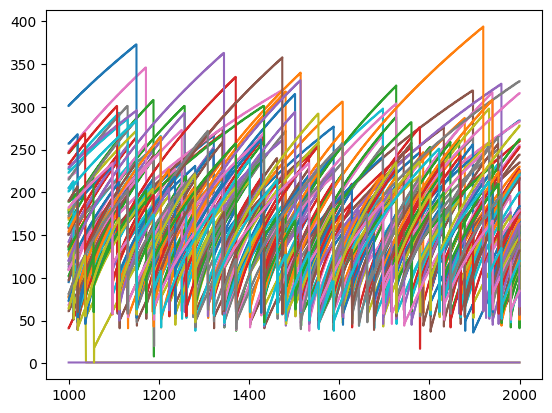

In [17]:
timeSum = defaultdict(int)
for node in range(2, 62):
    a, b = getData(f"tcp-dumbbell regular interval (sync rate calc)/dumbbell-{node}.cwnd", 1000, 2000)
    for i in range(len(a)):
        timeSum[a[i]] += b[i]

In [22]:
len(timeSum)

10000

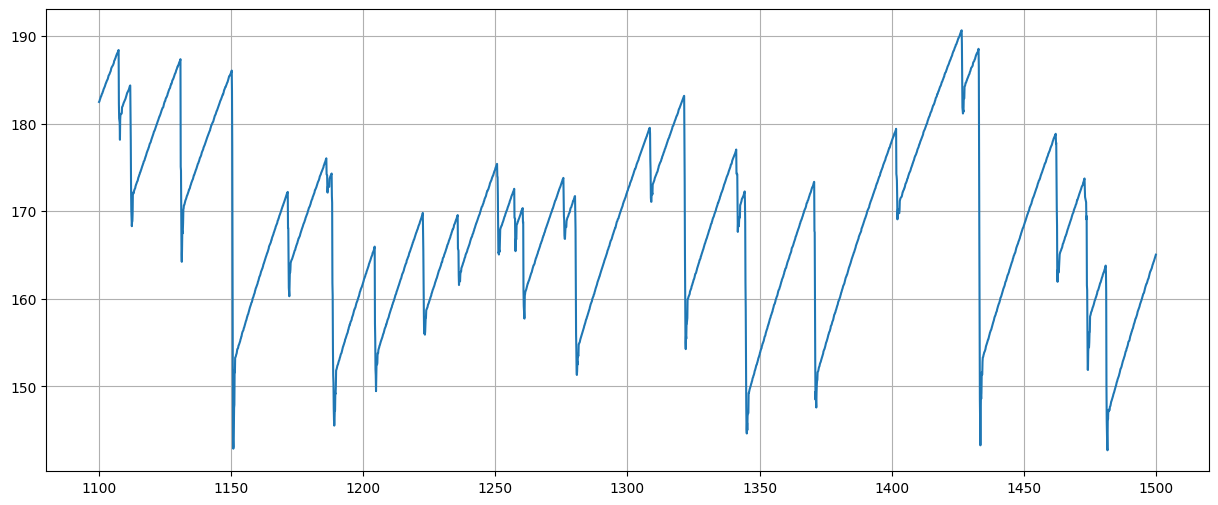

In [23]:
plt.figure(figsize=(15,6))
plt.grid()
timeData = list(timeSum.keys())[1000:5000]
sumWin = list(timeSum.values())[1000:5000]
sumWin = [i/60 for i in sumWin]
# plt.plot([i for i in range(len(timeData))], sumWin)
plt.plot(timeData, sumWin)
# plt.scatter(timeData, sumWin)

# for xi, yi in zip(timeData, sumWin):
#     plt.annotate(str(round(yi, 2)),
#                 xy=(xi, yi), xycoords='data',
#                 xytext=(5, -5), textcoords='offset points')

# import pandas as pd
# df = pd.DataFrame({'timeStamp' : timeData, 'avgWin' : sumWin})
# df.to_csv('TCP_Linux_Reno_AvgWin.csv')


In [22]:
offset = 3

for thres in range(8, 10):
    beta = 0; cntDip = 0; high = float('-inf'); low = float('inf'); n = len(timeData); i = 0
    highIdx = 0; lowIdx = 0
    gotHigh = 0
    while(cntDip < thres and i < n):
        # print(">>", high, " - ", low)
        if(sumWin[i] < high): gotHigh = True
        if(sumWin[i] > high):
            highIdx = i
            high = sumWin[i]
        if(gotHigh and sumWin[i] > low + offset):
            cntDip += 1
            # print(cntDip, ">> ", highIdx, " ", lowIdx)
            # print("at :", timeData[highIdx], " ", timeData[lowIdx])
            # print("val:", sumWin[highIdx], " ", sumWin[lowIdx])
            beta += (sumWin[highIdx] - sumWin[lowIdx])/sumWin[highIdx]
            i += 10
            highIdx = i; lowIdx = i
            high = float('-inf'); low = float('inf')
            gotHigh = False
        if(gotHigh and sumWin[i] < low):
            lowIdx = i 
            low = sumWin[i]
        i += 1

    print("count of dip: ", thres, "  ", beta/thres)
        


count of dip:  8    0.1525591304674788
count of dip:  9    0.1496216571457104


In [19]:
n = len(timeData)
def go(startIdx, mul):
    if startIdx >= n: return startIdx
    if mul*sumWin[startIdx] < mul*sumWin[startIdx - 1]:
        return startIdx
    return go(startIdx+1, mul)

for thres in range(8, 10):
    beta = 0; cntDip = 0
    mul = 1
    idxHigh = 0; idxLow = 0
    high = float('-inf'); low = float('inf'); temp = 0
    i = 1
    while(cntDip < thres and i < n):

        highIdx = go(i, 1)
        lowIdx = go(highIdx+1, -1)

        cntDip += 1
        # print(cntDip, ">> ", highIdx, " ", lowIdx)
        # print("at :", timeData[highIdx], " ", timeData[lowIdx])
        # print("val:", sumWin[highIdx], " ", sumWin[lowIdx])
        beta += (sumWin[highIdx] - sumWin[lowIdx])/sumWin[highIdx]
                
        i = lowIdx+30

    print("count of dip: ", thres, "  ", beta/cntDip)
        

count of dip:  8    0.13217673322152182
count of dip:  9    0.13217673322152182


In [23]:
offset = 3

for thres in range(10, 30):
    beta = 0; cntDip = 0; high = float('-inf'); low = float('inf'); n = len(timeData); i = 0
    gotHigh = 0
    while(cntDip < thres and i < n):
        if(sumWin[i] < high): gotHigh = True
        high = max(high, sumWin[i])
        if(gotHigh and sumWin[i] > low + offset):
            cntDip += 1
            # print(cntDip, ">> ", highIdx, " ", lowIdx)
            # print("at :", timeData[highIdx], " ", timeData[lowIdx])
            # print(cntDip,"th Dip: from high -", round(high, 3), " to low-", round(low, 3))
            beta += (high - low)/high
            i += 10
            high = float('-inf'); low = float('inf')
            gotHigh = False
        if(gotHigh): low = min(low,  sumWin[i])
        i += 1

    print("count of dip:", thres, " Beta:", beta/thres)

count of dip: 10  Beta: 0.15659859399524195
count of dip: 11  Beta: 0.15891196908719035
count of dip: 12  Beta: 0.16971587941441094
count of dip: 13  Beta: 0.1654044362076607
count of dip: 14  Beta: 0.17065968761510092
count of dip: 15  Beta: 0.17755269800212167
count of dip: 16  Beta: 0.17685615446321082
count of dip: 17  Beta: 0.1706085528062844
count of dip: 18  Beta: 0.1723243297233482
count of dip: 19  Beta: 0.18263979250398307
count of dip: 20  Beta: 0.18406995371677276
count of dip: 21  Beta: 0.19038289064027558
count of dip: 22  Beta: 0.18172912288389942
count of dip: 23  Beta: 0.17382785667155595
count of dip: 24  Beta: 0.16658502931024113
count of dip: 25  Beta: 0.15992162813783148
count of dip: 26  Beta: 0.1537707962863764
count of dip: 27  Beta: 0.14807558160910322
count of dip: 28  Beta: 0.1427871679802067
count of dip: 29  Beta: 0.13786347253261336


In [ ]:
offset = 3

for thres in range(10, 30):
    beta = 0; cntDip = 0; high = float('-inf'); low = float('inf'); n = len(y); i = 0
    gotHigh = 0
    while(cntDip < thres and i < n):
        if(y[i] < high): gotHigh = True
        high = max(high, y[i])
        if(gotHigh and y[i] > low + offset):
            cntDip += 1
            print(cntDip, ">> ", high, " ", low)
            # print("at :", timeData[highIdx], " ", timeData[lowIdx])
            # print(cntDip,"th Dip: from high -", round(high, 3), " to low-", round(low, 3))
            beta += (high - low)/high
            i += 10
            high = float('-inf'); low = float('inf')
            gotHigh = False
        if(gotHigh): low = min(low,  y[i])
        i += 1

    print("count of dip:", thres, " Beta:", beta/thres)

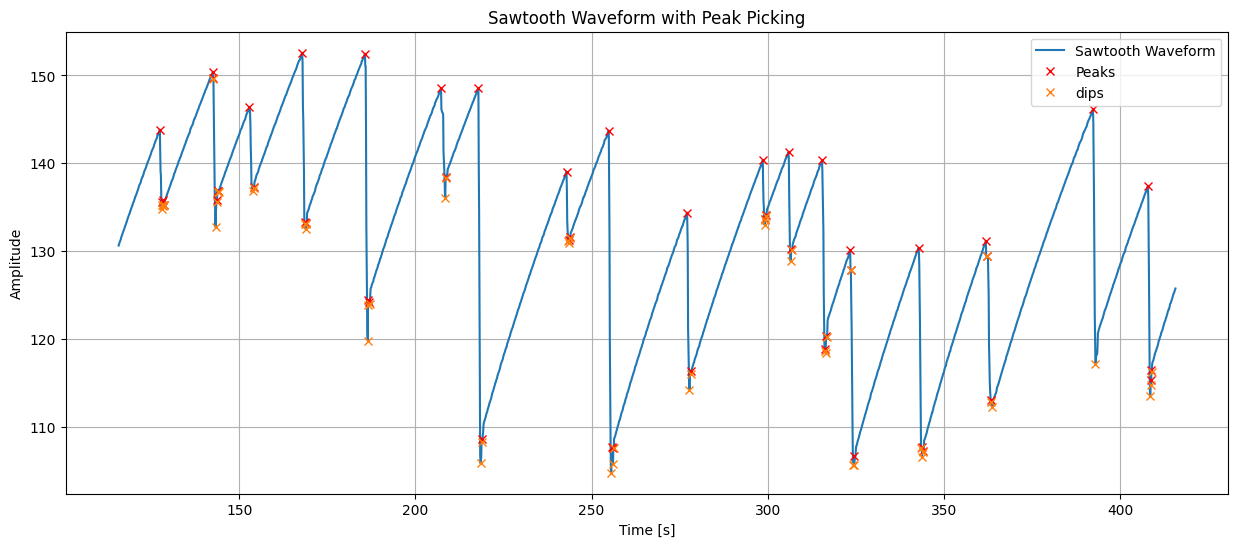

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth, find_peaks

# # Parameters
# frequency = 5  # Frequency in Hz
# amplitude = 1  # Amplitude of the waveform
# duration = 2   # Duration in seconds
# sampling_rate = 1000  # Sampling rate in Hz

# # Time array
# t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sawtooth waveform
# waveform = amplitude * sawtooth(2 * np.pi * frequency * t)
# waveform2 = -1 * waveform

# Find peaks
peaks, _ = find_peaks(sumWin)
dips, _ = find_peaks(-1*np.array(sumWin))
# peaks2, _ = find_peaks(waveform2)


# Plot the waveform and mark the peaks
plt.figure(figsize=(15,6))
plt.plot(timeData, sumWin, label='Sawtooth Waveform')
plt.plot([timeData[i] for i in peaks], [sumWin[i] for i in peaks], 'rx', label='Peaks')
plt.plot([timeData[i] for i in dips], [sumWin[i] for i in dips], 'x', label='dips')
# plt.plot(t[peaks2], waveform[peaks2], 'gx', label='Peaks2')
plt.title('Sawtooth Waveform with Peak Picking')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
len(peaks)

15

In [24]:
data = np.load("tcp-dumbbell regular interval (sync rate calc).npy")
np.linalg.norm(data)
l = []
for mat in data:
    mat_norm = np.linalg.norm(mat)
    # print(mat.shape)
    # print(mat_norm)
    l.append(mat_norm)

norms = l[1000:5000]

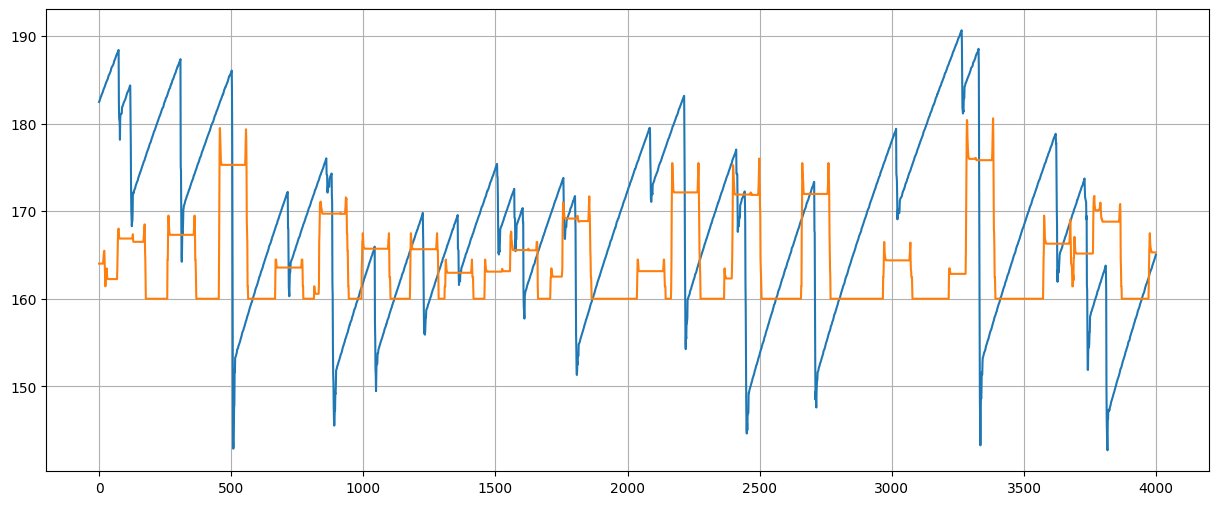

In [28]:
plt.figure(figsize=(15,6))
plt.grid()
# plt.plot([i for i in range(len(timeData))], sumWin)
plt.plot([i for i in range(4000)], [i for i in sumWin])
plt.plot([i for i in range(4000)], [i + 160 for i in norms])

In [32]:
catchingThreshold = 8; droppingThreshold = 5

for thres in range(8, 10):
    beta = 0; cntDip = 0; high = float('-inf'); low = float('inf'); n = len(timeData)
    flg = 0
    gotHigh = 0
    for i in range(50, 1000):
        if cntDip >= thres: break
        if flg and (norms[i] < droppingThreshold):
            print(high, low, i)
            beta += (high - low)/high
            cntDip += 1
            high = float('-inf'); low = float('inf')
            print("end", i)
            flg = 0
        elif flg or (norms[i] > catchingThreshold):
            if not flg: print("start", i)
            # print(1)
            flg = True
            high = max(high, sumWin[i])
            low = min(low, sumWin[i])
        
        
    print("count of dip:", thres, " Beta:", beta/cntDip)

start 74
188.4 168.28333333333333 175
end 175
start 262
187.35 164.21666666666667 364
end 364
start 455
186.05 142.88333333333333 562
end 562
start 835
176.03333333333333 145.51666666666668 942
end 942
count of dip: 8  Beta: 0.15890668077213183
start 74
188.4 168.28333333333333 175
end 175
start 262
187.35 164.21666666666667 364
end 364
start 455
186.05 142.88333333333333 562
end 562
start 835
176.03333333333333 145.51666666666668 942
end 942
count of dip: 9  Beta: 0.15890668077213183


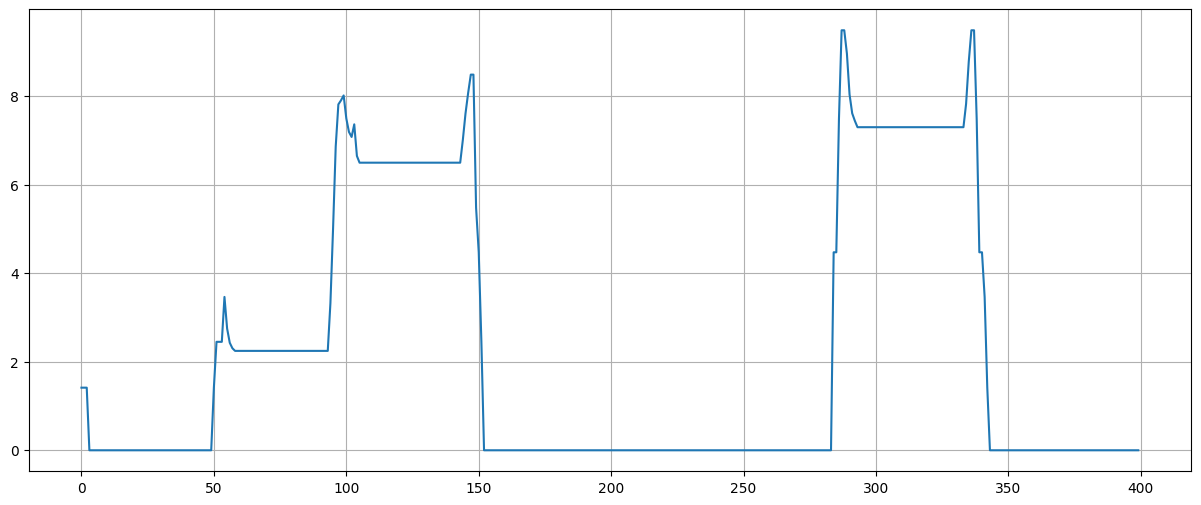

In [86]:
plt.figure(figsize=(15,6))
plt.grid()
# plt.plot([i for i in range(len(timeData))], sumWin)
# plt.plot([i for i in range(500)], [i for i in sumWin[:500]])
plt.plot([i for i in range(400)], [i for i in norms[:400]])